In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime
from keystroke_module import *

In [ ]:
# TO DO: kontrola bledow np. w konstruktorze klasy -?
# zalozenie minimalnej dlugosci: 100 czy 150? (bo wynika ze w ciagu 6min z 1.datasetu najmniej to 107 i 117 po filtracji, reszta co najmniej 150 kikniec, srednio na osobe wychodzi 600)

## Read data - (1. dataset)

d:\studia_mgrEIM\master_diploma\repo\masterdiploma\keystroke_module.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=['file_2'], inplace=True)


Patients with PD:  60
Patients without PD:  56


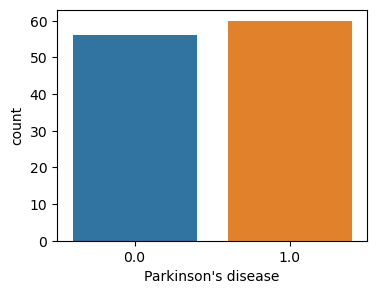

In [2]:
filename1 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv'
filename2 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv'
path = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/all/'

data1 = nqDataset(filename1, filename2)
data1.show_stats()

In [4]:
data1.prepare_dataset(path, feature_extract=2)
print(data1.trainset.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[7.92056205e-02 3.35935759e-03 1.79655963e-02 4.15543119e-03
 1.38233059e+00 1.88254905e+00 6.96184616e-01 4.97550589e-01
 4.37098402e-08 5.71580329e-07            nan]
[9.03887220e-03 4.28206570e-02 2.74598243e-01 1.15866535e-01
 6.52975352e+00 5.13758457e+00 2.09763171e+00 9.50489500e-01
 4.37098402e-08 5.71580329e-07            nan]
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
(81, 22)


In [5]:
data1.train_ground_truth

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.])

In [6]:
data1.trainset

array([[8.47899487e-02, 5.41639468e-03, 2.04014577e-02, ...,
        1.21276183e-07, 1.58589188e-06, 1.03009097e-02],
       [2.00361353e-01, 7.49368759e-02, 4.96009715e-02, ...,
        1.05046784e-11, 1.37366494e-10, 2.11423729e-01],
       [1.28824585e-01, 7.56197214e-03, 3.52010698e-02, ...,
        5.46395758e-08, 7.14505168e-07, 3.02923513e-02],
       ...,
       [9.12303750e-02, 5.88875386e-03, 3.77413100e-02, ...,
        1.89450614e-07, 2.47738824e-06, 7.38902678e-02],
       [1.16094392e-01, 7.84807448e-03, 2.65238493e-02, ...,
        3.55977534e-17, 4.65501029e-16, 2.19404697e-02],
       [8.95292851e-02, 5.50246016e-03, 2.01894949e-02, ...,
        2.74500388e-08, 3.58955836e-07, 8.33731494e-02]])

In [7]:
# tests
a = np.count_nonzero(np.isnan(data1.trainset))
print(a)
col_mean = np.nanmean(data1.trainset, axis=0)

inds = np.where(np.isnan(data1.trainset))
data1.trainset[inds] = np.take(col_mean, inds[1])
b = np.count_nonzero(np.isnan(data1.trainset))
print(b)

2
0


In [17]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

object = StandardScaler()
data_scaled = object.fit_transform(data1.trainset)

# X of shape (n_samples, n_features) 
svc_model = SVC(C=1)
svc_model.fit(data_scaled, data1.train_ground_truth)

SVC(C=1)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(data1.trainset, data1.train_ground_truth)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [10]:
object = StandardScaler()
data_scaled = object.fit_transform(data1.trainset)

svc_model = SVC(C=100, gamma=0.01)
svc_model.fit(data_scaled, data1.train_ground_truth)

SVC(C=100, gamma=0.01)

In [18]:
predictions = svc_model.predict(data1.testset)
print(predictions)
print(data1.test_ground_truth)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]


In [19]:
print(accuracy_score(data1.test_ground_truth, predictions))
print(classification_report(data1.test_ground_truth, predictions))

0.4857142857142857
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.49      1.00      0.65        17

    accuracy                           0.49        35
   macro avg       0.24      0.50      0.33        35
weighted avg       0.24      0.49      0.32        35



d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(data1.trainset, data1.train_ground_truth)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [14]:
predictions = clf.predict(data1.testset)
print(predictions)
print(data1.test_ground_truth)

[1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]


In [15]:
print(accuracy_score(data1.test_ground_truth, predictions))
print(classification_report(data1.test_ground_truth, predictions))

0.7714285714285715
              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75        18
         1.0       0.71      0.88      0.79        17

    accuracy                           0.77        35
   macro avg       0.79      0.77      0.77        35
weighted avg       0.79      0.77      0.77        35



## Read data - (2. dataset TAPPY)

In [11]:
class tappyDataset:
    def __init__(self, path1, path2):

        # load data
        self.files_list1 = os.listdir(path1)
        self.files_list2 = os.listdir(path2)
        users = [el.split("_")[1].split(".")[0] for el in self.files_list1]
        df = pd.DataFrame(data=users, columns=['pID'])

        for i, el in enumerate(df['pID']):
            temp = [x for x in self.files_list2 if x.startswith(el)]
            if len(temp):
                df.loc[[i], 'files'] = pd.Series([temp], index=df.index[[i]])
                with open(path1 + self.files_list1[i], 'r') as f:
                    for line in f:
                        if 'Parkinsons' in line:
                            read_info = line.strip().split(": ")
                            df.loc[[i], 'Parkinsons'] = read_info[1]

        df.dropna(inplace=True)
        df['Parkinsons'] = df['Parkinsons'].map({'True': 1.0, 'False': 0.0})

        self.user_info = df

        self.trainset = None
        self.testset = None
        self.train_ground_truth = None
        self.test_ground_truth = None
        self.features = None


    def show_stats(self):
        print('Patients with PD: ', len(
            self.user_info[self.user_info['Parkinsons'] == 1.0]))
        print('Patients without PD: ', len(
            self.user_info[self.user_info['Parkinsons'] == 0.0]))
        plt.figure(figsize=[4, 3])
        sns.countplot(x='Parkinsons', data=self.user_info)
        plt.xlabel('Parkinson\'s disease')

    @staticmethod
    def load_record(filename):
        df = pd.read_csv(filename, delimiter="\t", index_col=False, header=None, names=[
                         'User', 'Date', 'Timestamp', 'Hand', 'holdTime', 'Direction', 'flightTime', 'latencyTime'])

        df.drop(columns=['User'], inplace=True)
        df.drop(columns=['Direction'], inplace=True)

        df[df.columns[-3:]] = df[df.columns[-3:]
                                 ].apply(lambda x: x.lstrip('0') if type(x) == str else x)
        df[df.columns[-3:]
           ] = pd.to_numeric(df[df.columns[-3:]].stack(), errors='coerce').unstack()
        df[df.columns[-3:]] = df[df.columns[-3:]].apply(lambda x: x/1000)

        grouped_data = df.groupby('Date').agg(list)
        grouped_data['Length'] = grouped_data['Timestamp'].apply(len)

        idx = grouped_data['Length'].idxmax()

        ex_rec2 = df[df['Date'] == idx].copy()
        temp = ex_rec2['Timestamp'].apply(lambda x: is_date_parsing(x))
        ex_rec2.drop(ex_rec2[temp == False].index, inplace=True)

        # ex_rec1 = df[df['Date'] == idx].copy()
        # try:
        #     ex_rec1['Hour'] = ex_rec1['Timestamp'].apply(
        #         lambda x: datetime.strptime(x, '%H:%M:%S.%f').hour)
        # except ValueError as ve:
        #     # TO DO: check procedure of format in column, remove wrong values
        #     print('Procedure')
        #     temp = ex_rec1['Timestamp'].apply(lambda x: is_date_parsing(x))
        #     ex_rec1.drop(ex_rec1[temp == False].index, inplace=True)
        #     ex_rec1['Hour'] = ex_rec1['Timestamp'].apply(
        #         lambda x: datetime.strptime(x, '%H:%M:%S.%f').hour)

        # grouped_data = ex_rec1.groupby('Hour').agg(list)
        # grouped_data['Length'] = grouped_data['Date'].apply(len)

        # # jeśli jest odpowiednia liczba znakow
        # if grouped_data['Length'].max() > 100:
        #     idx = grouped_data['Length'].idxmax()
        #     ex_rec2 = ex_rec1[ex_rec1['Hour'] == idx].copy()
        #     ex_rec2.drop('Hour', axis=1, inplace=True)
        #     ex_rec2.reset_index(inplace=True)

        #     ex_rec2['Timestamp'] = ex_rec2['Timestamp'].apply(
        #         lambda x: datetime.strptime(x, '%H:%M:%S.%f'))
        #     ex_rec2['timeLapse'] = count_time_from_0(ex_rec2)
        # else:
        #     print('Not enough keystroke events!  ',
        #           grouped_data['Length'].max())
        #     ex_rec2 = []

        ex_rec2['Timestamp'] = ex_rec2['Timestamp'].apply(
                lambda x: datetime.strptime(x, '%H:%M:%S.%f'))
        ex_rec2['timeLapse'] = count_time_from_0(ex_rec2)

        # print(ex_rec2.tail())
        print(pd.isnull(ex_rec2).any(1).nonzero()[0])

        return ex_rec2

    def prepare_dataset(self, path, feature_extract=2):

        flag_fatal = [0, 0]
        if feature_extract == 2:
            n_features = 22
        else:
            n_features = 6

        self.features = np.zeros([len(self.user_info), n_features])

        for i, row in self.user_info.iterrows():
            # for i, row in self.train_df.reset_index(inplace=False).iterrows():
            # .iloc[45:]
            # DO NOT iterate: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
            # use .apply() instead

            # control
            print(i)
            if i == 10:
                print(row['files'])

            # take first file not all, but if not enough ...
            df_ID = self.load_record(path + row['files'][0])
            if len(df_ID) == 0:
                if len(row['files']) > 1:
                    print('Another file was found!')
                    df_ID = self.load_record(path + row['files'][1])
                    if len(df_ID) == 0:
                        print('Fatal - record not useful, with gt: ',
                              row['Parkinsons'])
                        flag_fatal[0] += 1
                        flag_fatal[1] += row['Parkinsons']
                        continue
                    else:
                        print('Success')
                else:
                    print('Only 1 file is available!')
                    continue

            df_ID = filter_record(df_ID, key_filter=False)

            if feature_extract == 2:
                va_HT, rate = feature_extract_method_2(
                    df_ID, dynamic_feature='holdTime', time_feature='timeLapse', assumed_length=360, window_time=20)
                if rate >= 0.5:
                    flag_fatal[0] += 1
                    flag_fatal[1] += row['Parkinsons']
                va_NFT, _ = feature_extract_method_2(
                    df_ID, dynamic_feature='flightTime', time_feature='timeLapse', assumed_length=360, window_time=20, normalize_option=True)
                self.features[i, :] = np.concatenate([va_HT, va_NFT], axis=0)
            
        # shuffle + random_state
        self.trainset, self.testset, self.train_ground_truth, self.test_ground_truth = train_test_split(
            self.features, self.user_info['Parkinsons'].to_numpy(), test_size=0.3, shuffle=True, random_state=42)

        print('flag_fatal: ', flag_fatal)

Patients with PD:  162
Patients without PD:  55


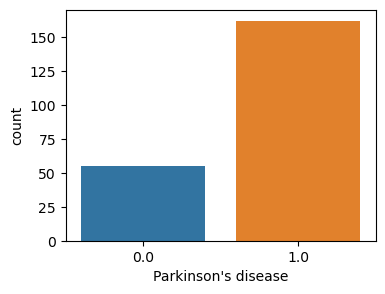

In [12]:
directory_path1 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Archived_users/'
directory_path2 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Tappy_Data/'

data2 = tappyDataset(directory_path1, directory_path2)
data2.show_stats()

In [13]:
data2.prepare_dataset(directory_path2, feature_extract=2)
print(data2.trainset.shape)

0


C:\Users\Hanna\AppData\Local\Temp\ipykernel_13676\2382544821.py:43: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter="\t", index_col=False, header=None, names=[
C:\Users\Hanna\AppData\Local\Temp\ipykernel_13676\2382544821.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(pd.isnull(ex_rec2).any(1).nonzero()[0])


AttributeError: 'Series' object has no attribute 'nonzero'

In [36]:
data2.train_ground_truth

9